# Importing Numpy, Pandas, Matplotlib

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inpunt Parameters

In [199]:
k=1.4             # Specific Heat Ratio (Cp/Cv)
pr=15             # PRESSURE RATIO
T1=298            # Ambient Temperature (Kelvin)
T3=1700           # Turbine Inlet Temperature (Kelvin)
P1=101325         # Ambient Pressure (Pascal)
cp=1004.5         # Specific Heat at constant Pressure (J/Kg K)

In [294]:
class Ideal_engine():
    
    def __init__(self,k,pr,T1,T3,P1,cp):
        self.k  = k
        self.pr = np.linspace(1,40,40)
        self.T3 = T3
        self.T1 = T1
        self.P1 = P1
        self.cp = cp
    
    def Calculation(self):
        T2=self.T1*self.pr**((self.k-1)/self.k)
        P2=P1*self.pr
        W2=self.cp*(T2-self.T1)
        T4=self.T3*(self.P1/P2)**((self.k-1)/self.k)
        W3=self.cp*(self.T3-T4)
        
        #data=pd.DataFrame({'Pressure Ratio':self.pr,"P2 (KPa)":P2/1000,"T2 (K)":T2,"T3 (K)":self.T3})
        return 
    
    def table(self):
        
        data=pd.DataFrame({'T2':self.T2})

In [295]:
engine=Ideal_engine(1.4,12,298,1700,101325,1004.5)

In [296]:
engine.Calculation()

In [386]:
class Ideal_engine():
    
    pr = np.linspace(1,50,50)

    def __init__(self,k=1.4,PR=20,T1=298,T3=1700,P1=298,cp=1005):
        self.k  = k
        self.T3 = T3
        self.T1 = T1
        self.P1 = P1
        self.cp = cp
    
    def Calculation(self):
        self.T2=T1*self.pr**((k-1)/k)
        self.P2=P1*self.pr
        self.W2=cp*(self.T2-T1)
        self.T4=T3*(P1/self.P2)**((k-1)/k)
        self.W3=cp*(T3-self.T4)
        self.WT=self.W3-self.W2
        self.Q=cp*(T3-self.T2)
        self.ef=self.WT/self.Q*100
        

        
    def data(self):
        
        data=pd.DataFrame({'Pressure Ratio':self.pr,"P2 (Pa)":self.P2,"T2 (K)":self.T2,"T3 (K)":self.T3,"Net Power (MW)":self.WT/1000000,"Therma Efficiency":self.ef})
        return data.head(5)
    
    def graphs(self):
        # Creating Arrays
        x= self.pr
        y_pow= self.WT/1000000
        y_ef=self.ef
        
        # Creating Plots
        
        fig, axes = plt.subplots(2,figsize=(10,10))
        
        axes[0].plot(x,y_pow)
        axes[0].set_xlabel('Pressure Ratio')
        axes[0].set_ylabel('Net Power')
        axes[0].grid(True)
        
        axes[1].plot(x,y_ef)
        axes[1].set_xlabel('Pressure Ratio')
        axes[1].set_ylabel('Thermal Efficiency')
        axes[1].grid(True)
        return axes
    

        
    


In [387]:
prueba=Ideal_engine(1.4,12,298,1700,101325,1004.5)

In [388]:
prueba.Calculation()

In [389]:
prueba.data()
#prueba.graphs()

,Pressure Ratio,P2 (Pa),T2 (K),T3 (K),Net Power (MW),Therma Efficiency
0,1.0,101325.0,298.000000,1700,0.000000,0.000000
1,2.0,202650.0,363.266069,1700,0.241245,17.966464
2,3.0,303975.0,407.883956,1700,0.349663,26.940004
3,4.0,405300.0,442.826298,1700,0.413009,32.704990
4,5.0,506625.0,471.978243,1700,0.454704,36.861496


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A23058E080>,
      dtype=object)

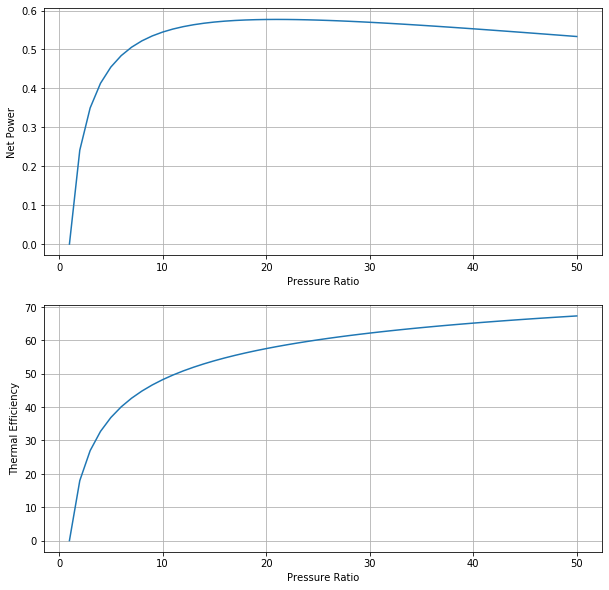

In [390]:
prueba.graphs()